<h2> Internet_Traffic Assignment 1</h2>

<h2>By Edison Nkurunungi - JAN22/COMP/959U</h2>

<b>Install the of scikit-learn library</b>

In [1]:
!pip install scikit-learn

 <b>Import the necessary libraries</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

<b>Import r2_score from sklearn library</b>

In [3]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

<b>Visualize the Historical Data</b>

In [5]:
filename = './InternetData/internet_traffic_hist.csv'
df_hist = pd.read_csv(filename)
df_hist.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


In [6]:
df_hist.tail()

,traffic,year
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014
10,931.200929,2015


<b>Visualize the internet volume traffic</b>

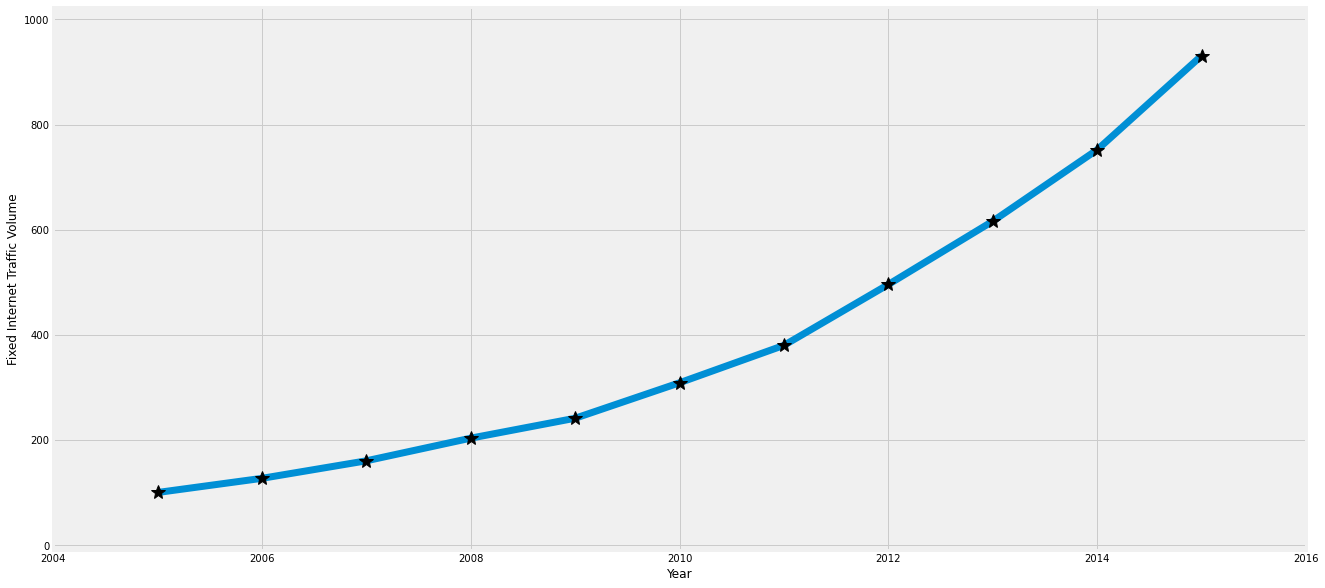

In [7]:
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

# XY Plot of year and traffic
plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

<b>Simple Linear Regression: First Order Polynomial</b>

The slope of line is 79.52710966244513.
The y intercept is -159457.12265833947.
The best fit simple linear regression line is 79.52710966244513x + -159457.12265833947.


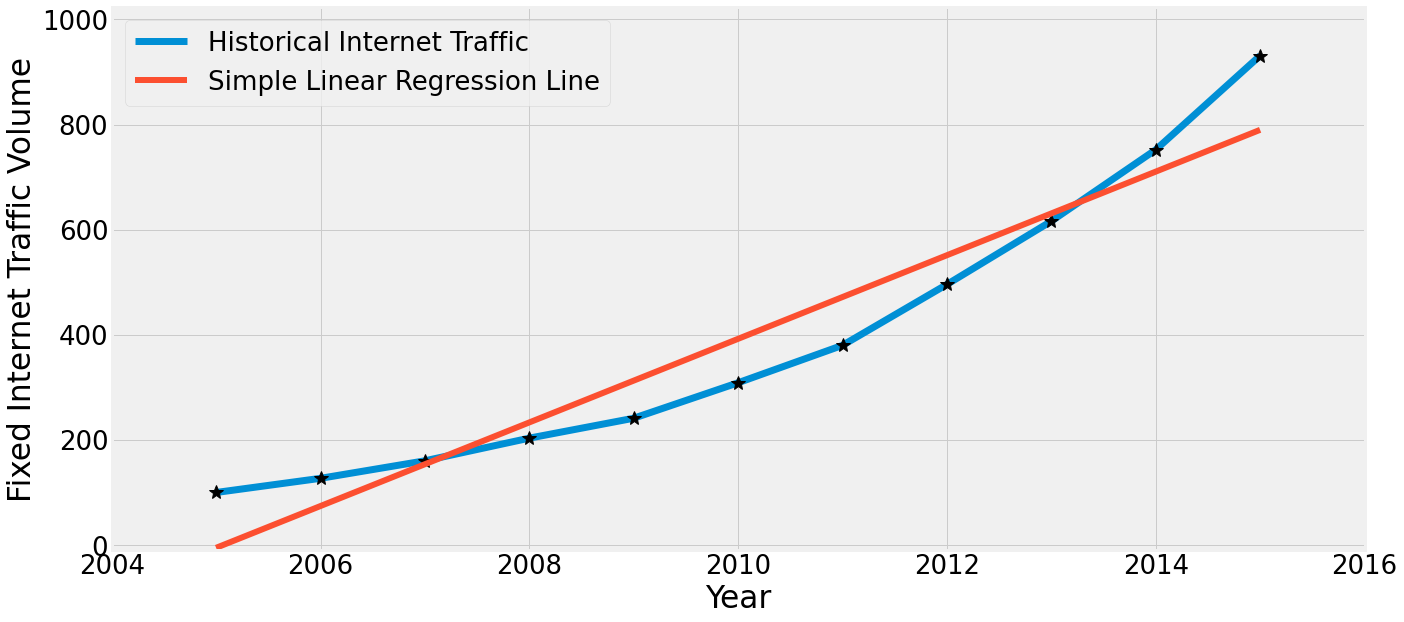

In [8]:
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

<b>Linear Regression: Higher Order Polynomials</b>

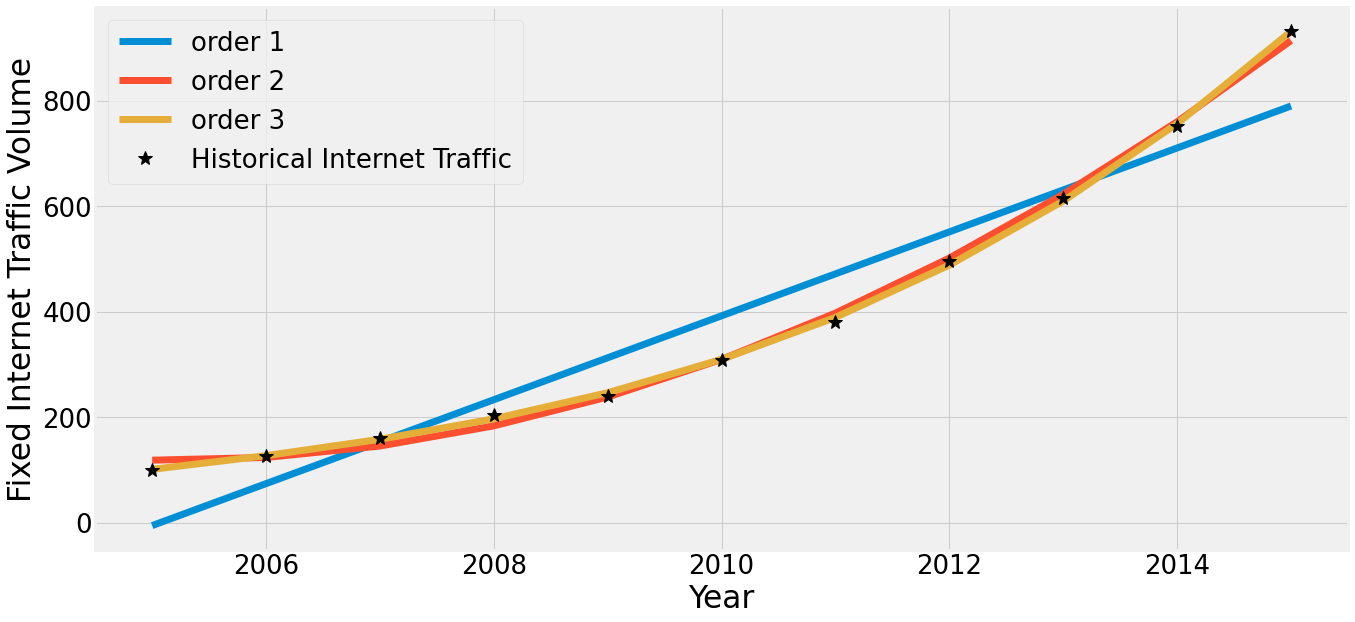

In [9]:
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

<b>Calculating the Errors</b>

In [10]:
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

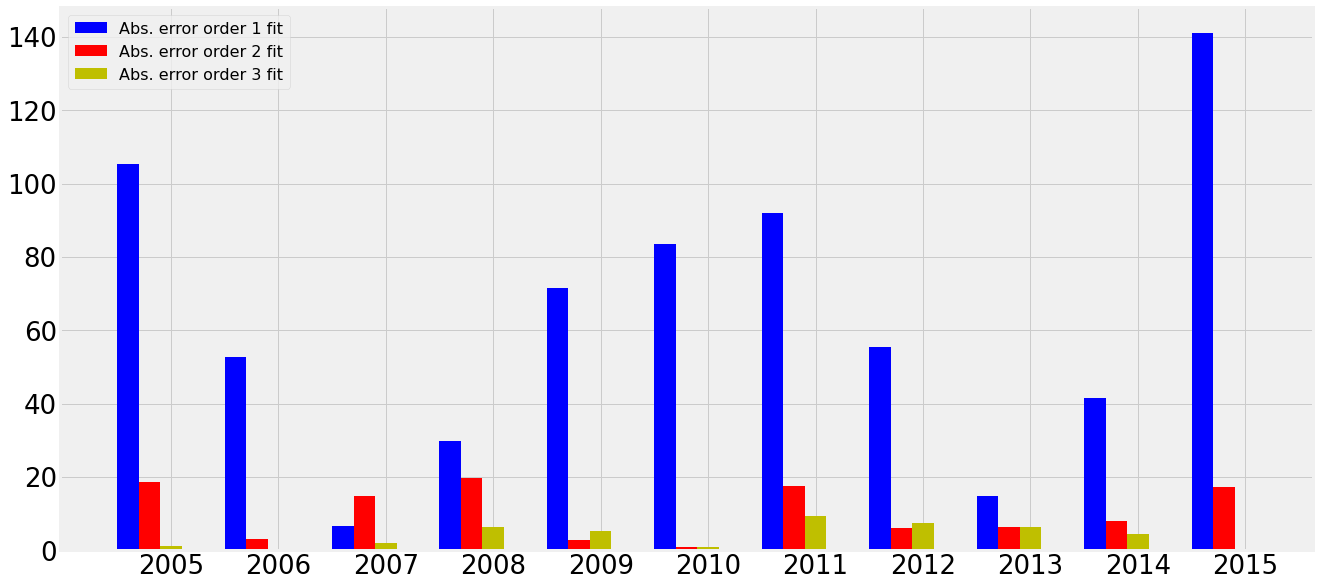

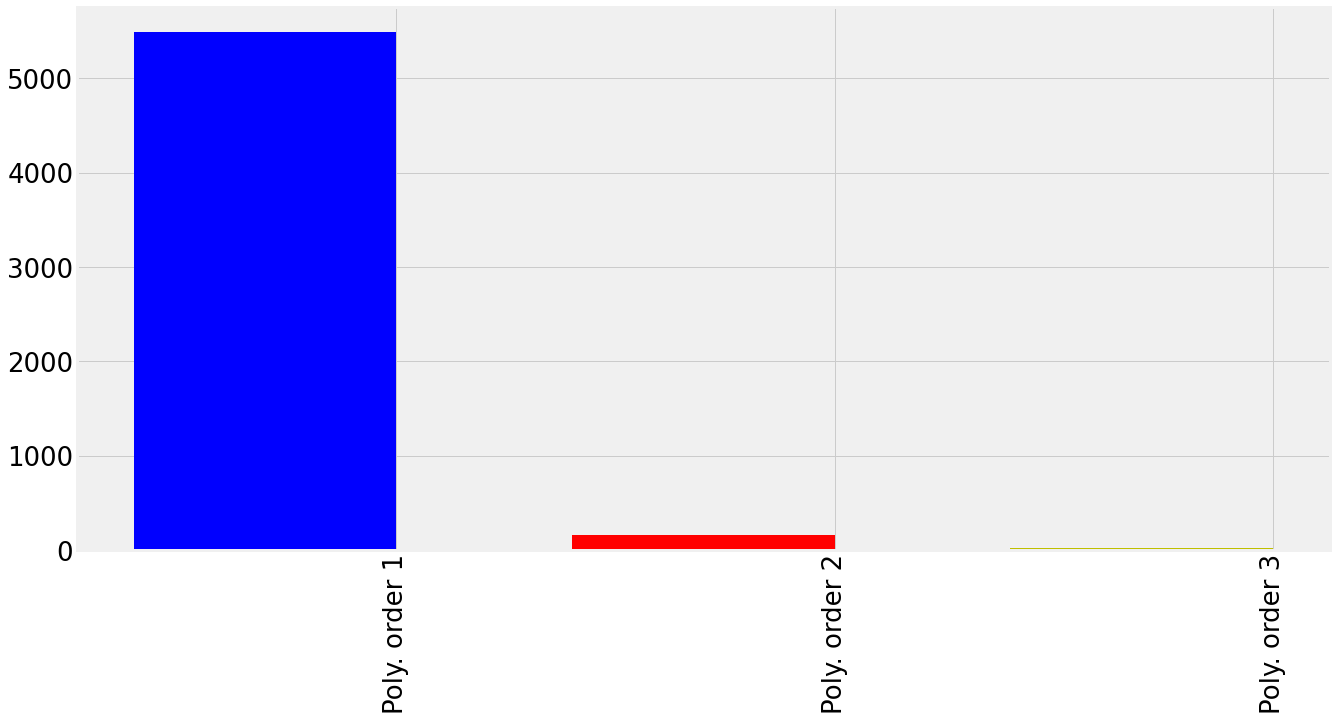

In [13]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

<p>From the plot above, it appears that the third polynomial order has the least amount of errors, and the error between the 2nd and 3rd orders is negligible. This suggests that the third polynomial is the best fit for the orders used</p>

<b>To determine the parameters for this equation:</b>

In [14]:
# Polynomial function order
order = 3

x = df_hist.year.values      # regressor
y = df_hist.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials 
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129404e-01 -2.90500578e+03  5.82252085e+06 -3.89005387e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.5784482955933 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30742598 0.3912493  2.02723074 6.32983446 5.28394069 0.93069372
 9.41691783 7.34010511 6.27729986 4.48133599 0.16291139]
The MSE is :25.17218343113269


<b>Non-Linear Regression Model: Exponential Growth</b>

In [15]:
# Non linear regression model fitting

# First, define the regression model function, in this case, we'll choose an exponential of the form y= a*(b^(x))
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
y = df_hist.traffic.values  # regressand

# use curve_fit to find the exponential parameters vector p. cov expresses the confidence of the 
# algorithm on the estimated parameters 
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df_hist)

print('The estimated exponential parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated exponential parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

models.append(p)

errors_hist.append(e) # Store the absolute error 
mse_hist.append(mse)

The estimated exponential parameters are: [103.37820148   1.24678465]
The errors for each value of x, given the estimated exponential parameters are: 
 [ 3.37820148  1.95659906  0.39475809  3.03416216  8.50876833  2.65664482
  8.32850909 11.70265945 12.59154092  0.47531784  7.10276492]
The MSE is :47.23616366678741


<p>The true growth rate r for the Internet traffic data was 0.22 and the initial value a was 100. The estimated values for these paramters are 103.38 and 1.2467-1= 0.25. The discrepancy between those values is due to the unpredictable yearly variations. The curve_fit function estimates are off by 13% for r and 3% for a. Not bad!</p>

<h2>Comparing Models</h2>

<b>Compare the errors and visualize the fit for the different regression models</b>

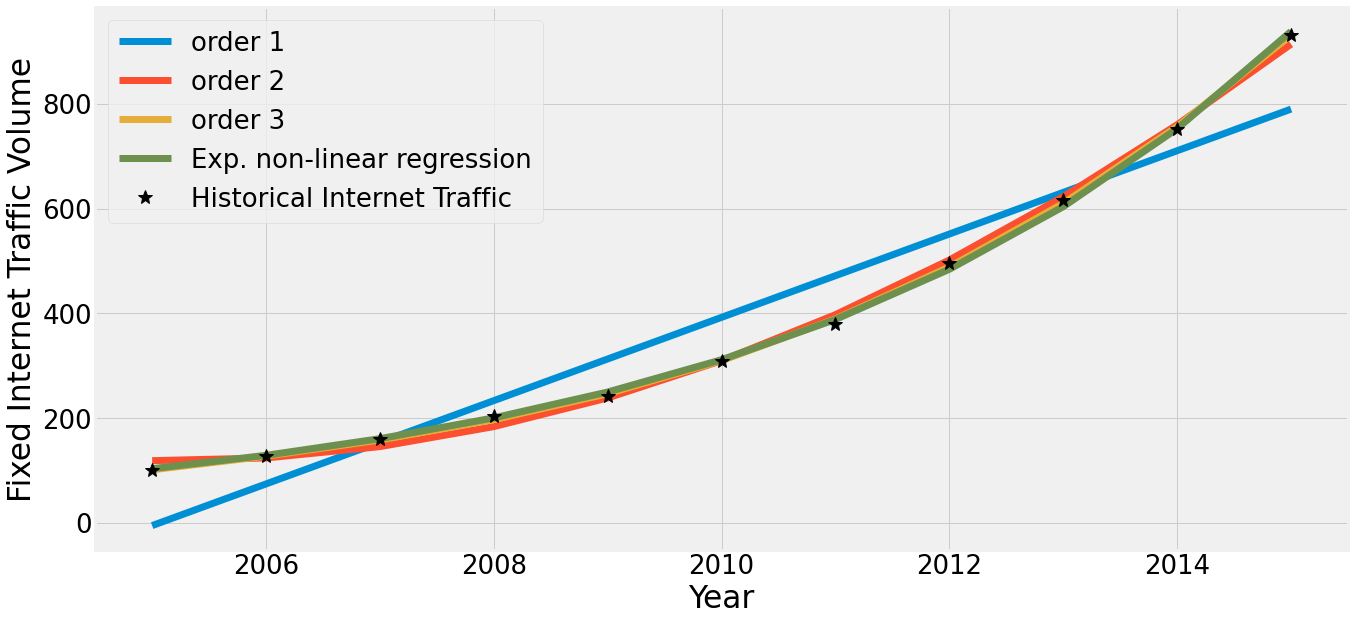

In [16]:
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:-1]:
    
    x = df_hist.year.values      
    y = df_hist.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

# Visualize exponenetial model fit
x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
plt.plot(df_hist.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_hist.year, df_hist.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()

<p>For the selected range of year, the difference between a 2nd or 3rd order polynomial regression model and the exponential one is negligible. Let's visualize the actual errors.</p>

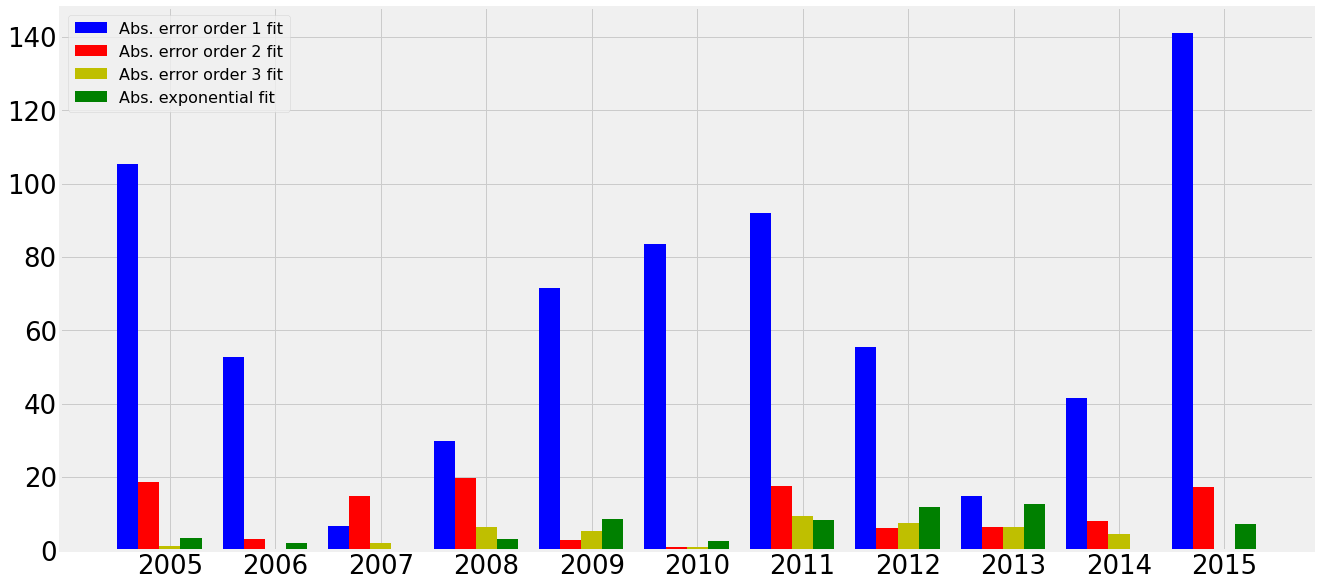

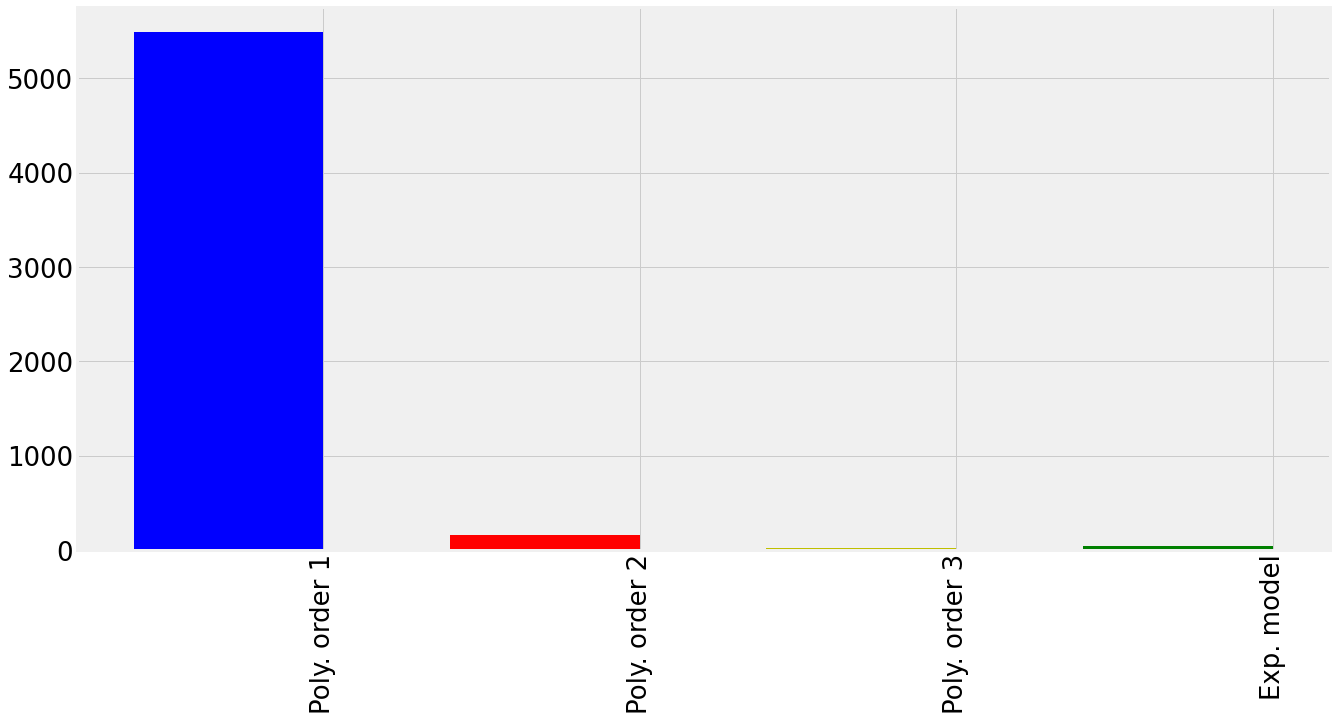

In [17]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=90)
plt.show()

<p>From the last plot, it seems that a third order polynomial, while not being the true model, fits better the traffic measurements in the observed range.</p>